In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as scb

In [122]:
df = pd.read_csv('train.csv')
df
# X = df.iloc[:,[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
# y = df.iloc[:, 1:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
## Handling the null vanlues.
# Age, Cabin, Embarked columns have null values


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


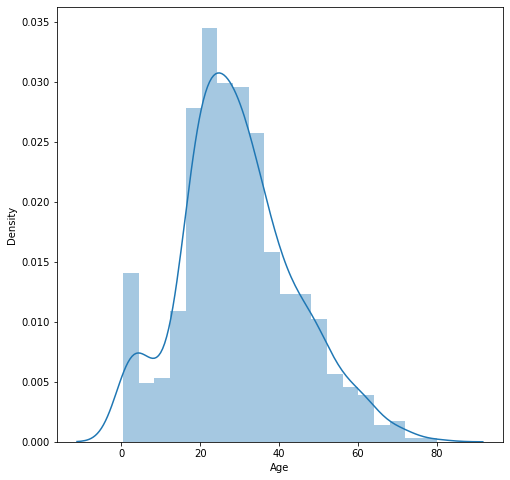

In [126]:
#Handling nan values in age column.
plt.figure(figsize=(8,8))
g = scb.distplot(df['Age'])
#g = g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'after replacing nan values')

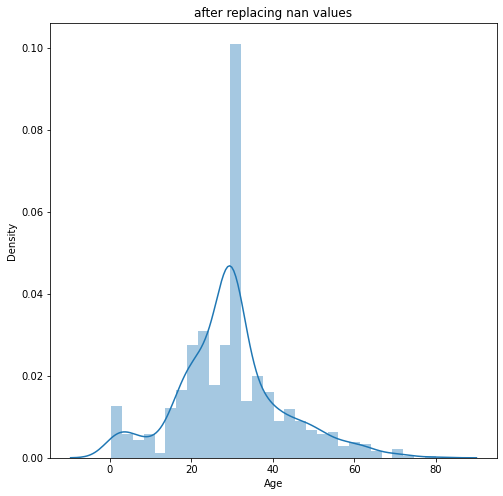

In [127]:
## replacing nan values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

plt.figure(figsize=(8,8))
g = scb.distplot(df['Age'])
plt.title('after replacing nan values')

In [128]:
#Handling nan values in Cabin column.

In [129]:
df['Cabin'].isnull().sum()
# for i in df['Cabin'].value_counts():
#     print(i)

687

In [130]:
## 687 rows are null in 'Cabin' column so we will drop the column
df.drop(labels=['Cabin'], axis=1, inplace=True)

In [131]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [132]:
## Handling nan values in Embarked column.
df['Embarked'].isnull().sum()

2

<AxesSubplot:xlabel='Embarked', ylabel='count'>

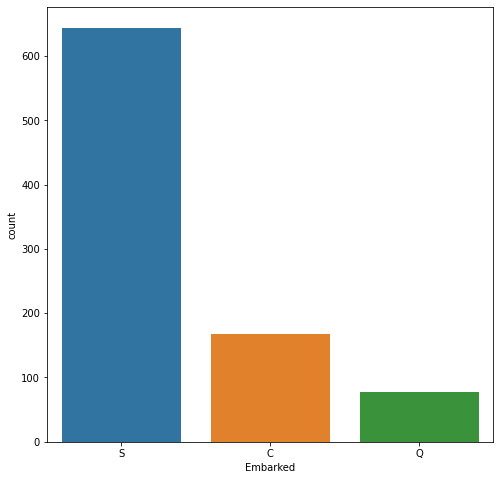

In [133]:
plt.figure(figsize=(8,8))
scb.countplot(x=df['Embarked'], order=df['Embarked'].value_counts().index, data=df)

In [134]:
## replacing Embarked nan values with 's'
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [135]:
## dropping the columns PassengerId, Name, Ticket
df.drop(labels=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [136]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [137]:
##handling categorical columns Sex, Embarked
# handling categorical columns Sex
sex_map = {'male': 0, 'female': 1}

df['Sex'] = df['Sex'].map(sex_map)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [138]:
# handling categorical columns Embarked
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [140]:

embarked_map = {'S': 0, 'C': 1, 'Q': 2}

df['Embarked'] = df['Embarked'].map(embarked_map)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [142]:
## rename the column 
df.rename(columns={'Survived':'survived', 'Pclass':'pclass', 'sex':'sex', 'Age':'age', 'SibSp':'sibsp', 
                   'Parch':'parch', 'Fare':'fare','Embarked':'embarked'}, inplace=True)

In [143]:
df

,survived,pclass,Sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [145]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [146]:
X

,pclass,Sex,age,sibsp,parch,fare,embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [147]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [148]:
## deviding tarin data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [149]:
x_train, x_test, y_train, y_test

(     pclass  Sex        age  sibsp  parch     fare  embarked
 140       3    1  29.699118      0      2  15.2458         1
 439       2    0  31.000000      0      0  10.5000         0
 817       2    0  31.000000      1      1  37.0042         1
 378       3    0  20.000000      0      0   4.0125         1
 491       3    0  21.000000      0      0   7.2500         0
 ..      ...  ...        ...    ...    ...      ...       ...
 835       1    1  39.000000      1      1  83.1583         1
 192       3    1  19.000000      1      0   7.8542         0
 629       3    0  29.699118      0      0   7.7333         2
 559       3    1  36.000000      1      0  17.4000         0
 684       2    0  60.000000      1      1  39.0000         0
 
 [712 rows x 7 columns],
      pclass  Sex        age  sibsp  parch      fare  embarked
 495       3    0  29.699118      0      0   14.4583         1
 648       3    0  29.699118      0      0    7.5500         0
 278       3    0   7.000000      4     

In [ ]:
## model building
## using classification to classify the data
## using Logistic Regrassion, K-NN, SVM, Naive Bayes' , Decission Tree


In [150]:
## using Logistic Regrassion
from sklearn.linear_model import LogisticRegression
logisticRegrassionClassifier = LogisticRegression(random_state=0)
logisticRegrassionClassifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [151]:
y_pred = logisticRegrassionClassifier.predict(x_test)

In [155]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8044692737430168


In [212]:
## using K-NN
from sklearn.neighbors import KNeighborsClassifier
def kNeighborsClassifier_test():
    for i in range(1,21):
        kNeighborsClassifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
        kNeighborsClassifier.fit(x_train, y_train)
        y_pred = kNeighborsClassifier.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        print('n_neighbors - ',i,'  score - ' ,score)

kNeighborsClassifier_test()

n_neighbors -  1   score -  0.6815642458100558
n_neighbors -  2   score -  0.7039106145251397
n_neighbors -  3   score -  0.7039106145251397
n_neighbors -  4   score -  0.6927374301675978
n_neighbors -  5   score -  0.7262569832402235
n_neighbors -  6   score -  0.7262569832402235
n_neighbors -  7   score -  0.7486033519553073
n_neighbors -  8   score -  0.7039106145251397
n_neighbors -  9   score -  0.7318435754189944
n_neighbors -  10   score -  0.7262569832402235
n_neighbors -  11   score -  0.7374301675977654
n_neighbors -  12   score -  0.7206703910614525
n_neighbors -  13   score -  0.7374301675977654
n_neighbors -  14   score -  0.7318435754189944
n_neighbors -  15   score -  0.7541899441340782
n_neighbors -  16   score -  0.7430167597765364
n_neighbors -  17   score -  0.7653631284916201
n_neighbors -  18   score -  0.7653631284916201
n_neighbors -  19   score -  0.770949720670391
n_neighbors -  20   score -  0.7541899441340782


In [213]:
## using SVM
from sklearn.svm import SVC
svmClassifier = SVC(kernel = 'linear', random_state = 0)
svmClassifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [214]:
y_pred = svmClassifier.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7877094972067039


In [215]:
## using naive bayes
from sklearn.naive_bayes import GaussianNB
naiveBayesClassifier = GaussianNB()
naiveBayesClassifier.fit(x_train, y_train)

GaussianNB()

In [216]:
y_pred = naiveBayesClassifier.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7932960893854749


In [217]:
## using decission Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
DecisionTreeClassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [218]:
print(accuracy_score(y_test, DecisionTreeClassifier.predict(x_test)))

0.7932960893854749


In [225]:
## using Randome Forest
from sklearn.ensemble import RandomForestClassifier
max_score = 0
n_estimators_val = 0;
for i in range(1, 21):
    randomForestClassifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0)
    randomForestClassifier.fit(x_train, y_train)
    score = accuracy_score(y_test, randomForestClassifier.predict(x_test))
    if max_score < score:
        max_score = score
        n_estimators_val = i

print(' max_score - ',max_score , ' -- at n_estimators_val', n_estimators_val)

 max_score -  0.8212290502793296  -- at n_estimators_val 6


In [226]:
## Randome Forest have the highest accuracy score 

classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [229]:
x_test

,pclass,Sex,age,sibsp,parch,fare,embarked
495,3,0,29.699118,0,0,14.4583,1
648,3,0,29.699118,0,0,7.5500,0
278,3,0,7.000000,4,1,29.1250,2
31,1,1,29.699118,1,0,146.5208,1
255,3,1,29.000000,0,2,15.2458,1
...,...,...,...,...,...,...,...
780,3,1,13.000000,0,0,7.2292,1
837,3,0,29.699118,0,0,8.0500,0
215,1,1,31.000000,1,0,113.2750,1
833,3,0,23.000000,0,0,7.8542,0


In [228]:
import pickle

import_file = open('RandomForestClassifier.pkl', 'wb')
pickle.dump(classifier, import_file)
import_file.close()